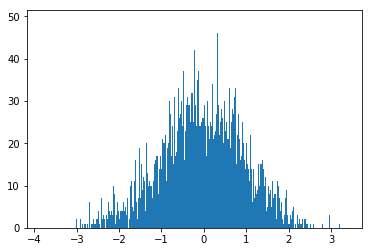

/home/work/local/lib/python2.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in double_scalars


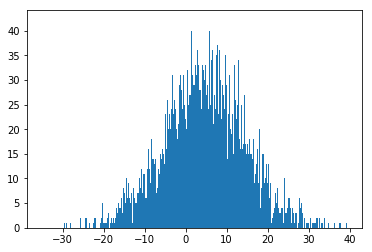

In [8]:
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time

mu,sig,N = 0,1,10000
pts = []

def t(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))

def metropolis(N):
    r = np.zeros(1)
    p = t(r[0])
    pts = []
    
    for i in range(N):
        rn = r + np.random.uniform(-1,1)
        pn = t(rn[0])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r)
    
    pts = np.array(pts)
    return pts
def metropolis_hasting(N): 
    # independence chain
    u = np.random.rand(N)
    mu = 5
    sigma = 10
    y = np.zeros(N)
    y[0] = np.random.normal(mu,sigma)
    for i in range(N-1):
        ynew = np.random.normal(mu,sigma)
        alpha = min(1,t(ynew)*q(y[i])/(t(y[i])*q(ynew)))
        if u[i] < alpha:
            y[i+1] = ynew
        else:
            y[i+1] = y[i]
    return y
b=metropolis(N)
plt.hist(b, bins=1000) 
plt.show()

b=metropolis_hasting(N)
plt.hist(b, bins=1000) 
plt.show()

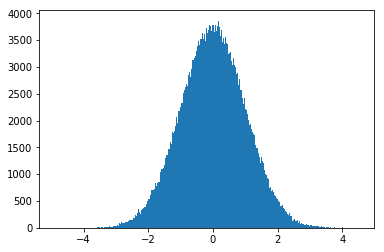

In [12]:
#coding:utf-8

#使用Metropolis-Hastings， 采样正太分布
import numpy as np
import math
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import time

mu,sig,N = 0,1,1000000
pts = []

def q(x):
    return (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x-mu)**2)/(2*sig**2)))

def metropolis(N):
    #初始值x0
    r = np.zeros(1)
    p = q(r[0])
    pts = []
    
    for i in range(N):
        #建议分布是均匀分布，使用这个分布的好处是aij=min{1, (q_ji*p_j/q_ij*p_i)}，其中q_ij和q_ji在建议分布中是相等的，因此aij仅仅是aij=min{1, p_j/p_i}
        #下一节点j
        rn = r + np.random.uniform(-1,1)
        #pj
        pn = q(rn[0])
        #如果p_j/p_i是1，接受转移
        if pn >= p:
            p = pn
            r = rn
        else:
            #否则，以一定概率接受
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        pts.append(r)
    
    pts = np.array(pts)
    return pts
    
b=metropolis(N)
plt.hist(b, bins=1000) 
plt.show()

In [14]:
print "hi"

hi


In [40]:
vec = [0.1, 0.2, 0.4, 0.3]
def sample_discrete(vec):
    u = np.random.rand()
    start = 0
    for i,p in enumerate(vec):
        if u > start:
            start += p
        else:
            return i-1
    return i
index2word = ["中", "国", "你", "好"]
result = dict([(w, 0) for w in index2word])
for i in range(100000):
    index = sample_discrete(vec)
    result[index2word[index]] += 1
for i,k in result.items():
    print i,k


你 39902
好 30204
中 9992
国 19902


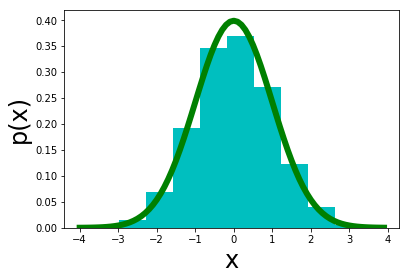

In [48]:
from pylab import *
import numpy as np

#box-muller的极坐标形式，推导可以参考https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
def boxmuller_polar(n):
    
    x = np.zeros((n,2))
    y = np.zeros((n,2))
    
    for i in range(n):
        x[i,:] = np.array([2,2])
        x2 = x[i,0]*x[i,0]+x[i,1]*x[i,1]
        while (x2)>1:
            x[i,:] = np.random.rand(2)*2-1
            x2 = x[i,0]*x[i,0]+x[i,1]*x[i,1]

        y[i,:] = x[i,:] * np.sqrt((-2*log(x2))/x2)
    
    y = np.reshape(y,2*n,1)
    return y
#box-muller基本形式
def boxmuller_basic(n):
    y = []
    for i in range(n):
        U1 = np.random.rand()
        U2 = np.random.rand()
        theta = np.pi * 2*U1
        r = np.sqrt(-2*log(U2))
        y.append(r*sin(theta))
        y.append(r*cos(theta))
#y = boxmuller(1000)
y = boxmuller(1000)
hist(y,normed=1,fc='c')
x = arange(-4,4,0.1)
plot(x,1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2),'g',lw=6)
xlabel('x',fontsize=24)
ylabel('p(x)',fontsize=24)
show()

reject count:  17889
Time  0.137351036072


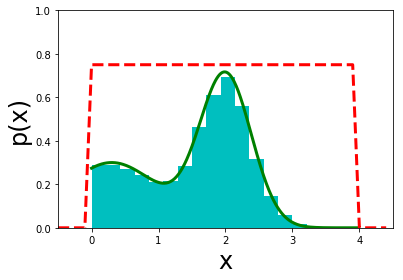

In [1]:
%matplotlib inline 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn

def qsample():
    """使用均匀分布作为q(x)，返回采样"""
    return np.random.rand()*4.

def p(x):
    """目标分布"""
    return 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3) 

def rejection(nsamples):
    
    M = 0.72#0.8 k值
    samples = np.zeros(nsamples,dtype=float)
    count = 0
    for i in range(nsamples):
        accept = False
        while not accept:
            x = qsample()
            u = np.random.rand()*M
            if u<p(x):
                accept = True
                samples[i] = x
            else: 
                count += 1
    print "reject count: ", count   
    return samples

x = np.arange(0,4,0.01)
x2 = np.arange(-0.5,4.5,0.1)
realdata = 0.3*np.exp(-(x-0.3)**2) + 0.7* np.exp(-(x-2.)**2/0.3) 
box = np.ones(len(x2))*0.75#0.8
box[:5] = 0
box[-5:] = 0
plt.plot(x,realdata,'g',lw=3)
plt.plot(x2,box,'r--',lw=3)

import time
t0=time.time()
samples = rejection(10000)
t1=time.time()
print "Time ",t1-t0

plt.hist(samples,15,normed=1,fc='c')
plt.xlabel('x',fontsize=24)
plt.ylabel('p(x)',fontsize=24)
plt.axis([-0.5,4.5,0,1])
plt.show()